<a href="https://colab.research.google.com/github/mastermindankur/stock-analysis/blob/main/stock_prediction_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!pip install bsedata
!pip install quandl

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import quandl
%matplotlib inline

In [127]:
# to be ale to view numbers in human readable format 2.058691e+08
pd.set_option('display.float_format', lambda x: '%.3f' % x)
quandl.ApiConfig.api_key = 'izbxGLp_K_zzzUJdN9sp'
sbi =quandl.get('BSE/BOM500112', start_date='2021-09-01', end_date='2021-12-26')
sensex =quandl.get('BSE/SENSEX', start_date='2021-09-01', end_date='2021-12-26')

In [128]:
forwarded=sbi.shift(1)
forwarded=forwarded.rename(columns={'% Deli. Qty to Traded Qty':'previous_day_delivered_qty'})
#forwarded=forwarded.rename(columns={'No. of Shares':'previous_day_no_of_shares'})
#forwarded=forwarded.rename(columns={'No. of Trades':'previous_day_no_of_trades'})
forwarded=forwarded.rename(columns={'Total Turnover':'previous_day_total_turnover'})

In [129]:
# Renaming the columns to avoid duplicate names
sbi=sbi.rename(columns={'Open':'sbi_open'})
sbi=sbi.rename(columns={'High':'sbi_high'})
sensex=sensex.rename(columns={'Open':'sensex_open'})
df=pd.concat([sbi,sensex,forwarded],axis=1)

In [130]:
data=df[['sbi_open','sensex_open','previous_day_delivered_qty','previous_day_total_turnover','sbi_high']]

In [131]:
data

,sbi_open,sensex_open,previous_day_delivered_qty,previous_day_total_turnover,sbi_high
Date,,,,,
2021-09-01,426.950,57763.530,nan,nan,432.500
2021-09-02,431.700,57423.650,24.140,334926856.000,433.400
2021-09-03,431.400,57983.450,22.930,231918996.000,434.200
2021-09-06,431.500,58411.620,26.170,245989882.000,433.750
2021-09-07,432.000,58418.690,25.200,163799347.000,432.000
...,...,...,...,...,...
2021-12-20,459.900,56517.260,34.870,396301843.000,463.950
2021-12-21,454.550,56320.020,33.480,388774565.000,458.300
2021-12-22,451.700,56599.470,37.160,468699163.000,457.350


In [132]:
X = data.iloc[1:, :-1].values
y = data.iloc[1:, -1].values

Increasing the no of features by using Polynomial Features

Generating  $x_1^1$ $x_1^2$ $x_1^3$ $x_1^4$

Generating  $x_2^1$ $x_2^2$ $x_2^3$ $x_2^4$

Generating  $x_3^1$ $x_3^2$ $x_3^3$ $x_3^4$

Generating  $x_4^1$ $x_4^2$ $x_4^3$ $x_4^4$

and so on ....


In [133]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_poly=poly_reg.fit_transform(X)

Splitting the data in training set and test set, Note here the split is on transformed input columns i.e. X_poly

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)

In [135]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred=regressor.predict(X_test)

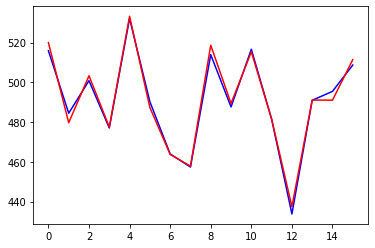

In [137]:
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='red')

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test,squared=False)

2.780770913295378